### **Graduate Program in Electrical and Computer Engineering**
#### Federal University of Ceará - Sobral Campus
##### Researcher 1: Marcelo Estevão da Silva - Registration: 561821
##### Researcher 2: Raimundo Alan Freire Moreira - Resgistration: 559987

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import os
from statistics import mean
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#### Data Aquisition

In [5]:
# impoting the dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/alanfm/wec/main/WEC_Perth_49.csv")
dataset.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [6]:
dataset.shape

(36043, 149)

In [7]:
# datset lines and columns

print(f'Lines: {dataset.shape[0]}')
print(f'Columns: {dataset.shape[1]}')

Lines: 36043
Columns: 149


In [8]:
# defining the X data

X = dataset.iloc[:,0:98]
X.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,800.0,800.0,746.17,837.53,689.76,874.93,632.40,912.18,0.0,1010.0


In [9]:
# defining the y data

y = dataset.iloc[:,-1]
y.head()

0    4102461.43
1    4103361.41
2    4103680.44
3    4105661.06
4    3752648.77
Name: Total_Power, dtype: float64

In [10]:
# dataframe to array
X = X.values
y = y.values


# Normalization
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

# division into train and teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Treinamento: {X_train.shape[0]}  ---  {(X_train.shape[0]/X.shape[0])*100:.2f}%')
print(f'Teste: {X_test.shape[0]}  ---  {(X_test.shape[0]/X.shape[0])*100:.2f}%')

Treinamento: 25230  ---  70.00%
Teste: 10813  ---  30.00%


### **Multilayer Perceptron - MLP**

In [11]:
# Funções para teste
functions = ['sigmoid','tanh','linear','relu']

# Quantidade de neurônios da camada oculta para teste
neurons = [round(1.1 * X_test.shape[1]), round(0.9 * X_test.shape[1]), round(0.7 * X_test.shape[1]), round(0.5 * X_test.shape[1]), round(0.3 * X_test.shape[1])]

# Metricas avaliadas
mse_values_mlp = {functions[i]: {neurons[j]: [] for j in range(0, len(neurons))} for i in range(0, len(functions))}
mse_mlp = {functions[i]: {neurons[j]: [] for j in range(0, len(neurons))} for i in range(0, len(functions))}
rmse_mlp = {functions[i]: {neurons[j]: [] for j in range(0, len(neurons))} for i in range(0, len(functions))}
mae_mlp = {functions[i]: {neurons[j]: [] for j in range(0, len(neurons))} for i in range(0, len(functions))}
r2_mlp = {functions[i]: {neurons[j]: [] for j in range(0, len(neurons))} for i in range(0, len(functions))}
time_mlp = {functions[i]: {neurons[j]: [] for j in range(0, len(neurons))} for i in range(0, len(functions))}

print(time_mlp['sigmoid'][108])


[]


In [12]:
# verificar 10 vezes e pegar melhor e a media (desvio padrão)
for f in functions:
    for n in neurons:
        for _ in range(10):
            # defining the model
            model = tf.keras.Sequential([
                tf.keras.layers.Dense(units=n, activation=f), # hidden layer
                tf.keras.layers.Dense(units=1, activation=f) # output layer
            ])

            # hyperparameters
            learning_rate = 0.01
            optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
            loss_function = 'mean_squared_error'
            model.compile(optimizer=optimizer, loss=loss_function)

            # Contagem de tempo de execução
            start_time_mlp = time.time()

            # training
            num_epochs = 30
            batch_size = 32
            history = model.fit(X_train,
                                y_train,
                                epochs=num_epochs,
                                batch_size=None,
                                verbose=0)
            
            # Contagem de tempo de execução
            end_time_mlp = time.time()

            # predictions
            y_pred = model.predict(X_test)

            # evaluation
            mse_mlp[f][n].append(mean_squared_error(y_test, y_pred))
            rmse_mlp[f][n].append(np.sqrt(mean_squared_error(y_test, y_pred)))
            mae_mlp[f][n].append(mean_absolute_error(y_test, y_pred))
            r2_mlp[f][n].append(r2_score(y_test, y_pred))


            # getting MSE value for each epoch
            mse_values_mlp[f][n].append(history.history['loss'])

            # Run time
            time_mlp[f][n].append(end_time_mlp - start_time_mlp)



338/338 [==============================] - 0s 694us/step


In [16]:
os.makedirs('results/mlp', exist_ok=True)

for f in functions:
    mse_values_mlp_data = pd.DataFrame.from_dict(mse_values_mlp[f])
    mse_values_mlp_data.to_csv('results/mlp/mse_values_'+ f +'.csv')

    mse_mlp_data = pd.DataFrame.from_dict(mse_mlp[f])
    mse_mlp_data.to_csv('results/mlp/mse_'+ f +'.csv')

    rmse_mlp_data = pd.DataFrame.from_dict(rmse_mlp[f])
    rmse_mlp_data.to_csv('results/mlp/rmse_'+ f +'.csv')

    mae_mlp_data = pd.DataFrame.from_dict(mae_mlp[f])
    mae_mlp_data.to_csv('results/mlp/mae_'+ f +'.csv')

    r2_mlp_data = pd.DataFrame.from_dict(r2_mlp[f])
    r2_mlp_data.to_csv('results/mlp/r2_'+ f +'.csv')

    time_mlp_data = pd.DataFrame.from_dict(time_mlp[f])
    time_mlp_data.to_csv('results/mlp/time_'+ f +'.csv')

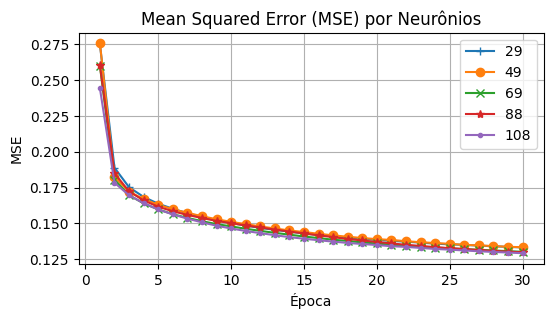

In [106]:
# getting MSE value for each epoch
plt.figure(figsize=(6, 3))

x = range(1, len(mse_values_mlp['tanh'][29][0]) + 1)

y1 = mse_values_mlp['tanh'][29][0]
y2 = mse_values_mlp['tanh'][49][0]
y3 = mse_values_mlp['tanh'][69][0]
y4 = mse_values_mlp['tanh'][88][0]
y5 = mse_values_mlp['tanh'][108][0]

plt.plot(x, y1, label='29', marker='+')
plt.plot(x, y2, label='49', marker='o')
plt.plot(x, y3, label='69', marker='x')
plt.plot(x, y4, label='88', marker='*')
plt.plot(x, y5, label='108', marker='.')

plt.legend(loc='upper right')

plt.xlabel('Época')
plt.ylabel('MSE')

plt.title('Mean Squared Error (MSE) por Neurônios')
plt.grid(True)
plt.show()

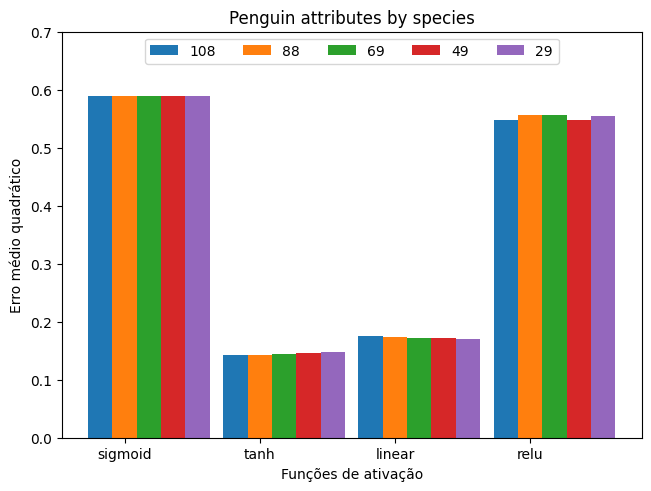

In [101]:
chart_functions = tuple(functions)
chart_neurons = {str(n): () for n in neurons}

for n in neurons:
    tmp_l = []
    for f in functions:
        tmp_l.append(mean(mse_mlp[f][n]))
    chart_neurons[str(n)] = tuple(tmp_l)

x = np.arange(len(chart_functions))  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in chart_neurons.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Erro médio quadrático')
ax.set_xlabel('Funções de ativação')
ax.set_title('MSE - Função por quantidade de neurônios')
ax.set_xticks(x + width, chart_functions)
ax.legend(loc='upper center', ncols=5)
ax.set_ylim(0, 0.7)

plt.show()

In [107]:
for f in functions:
    for n in neurons:
        #print(f'Média MSE Testes: {mean(mse_values_mlp[f][n])} | função: {f} | qtd neurônios: {n}')
        print("============================================================")
        print(f'Média MSE: {min(mse_mlp[f][n])} | função: {f} | qtd neurônios: {n}')
        print("============================================================")
        print(f'Média RMSE: {min(rmse_mlp[f][n])} | função: {f} | qtd neurônios: {n}')
        print("============================================================")
        print(f'Média MAE: {min(mae_mlp[f][n])} | função: {f} | qtd neurônios: {n}')
        print("============================================================")
        print(f'Média R²: {min(r2_mlp[f][n])} | função: {f} | qtd neurônios: {n}')
        print("============================================================")
        print(f'Time: {min(time_mlp[f][n])} | função: {f} | qtd neurônios: {n}')

Média MSE: 0.5877263798935977 | função: sigmoid | qtd neurônios: 108
Média RMSE: 0.7666331455745947 | função: sigmoid | qtd neurônios: 108
Média MAE: 0.5524584448423745 | função: sigmoid | qtd neurônios: 108
Média R²: 0.4143642952347538 | função: sigmoid | qtd neurônios: 108
Time: 17.057608127593994 | função: sigmoid | qtd neurônios: 108
Média MSE: 0.5885280781462398 | função: sigmoid | qtd neurônios: 88
Média RMSE: 0.7671558369368245 | função: sigmoid | qtd neurônios: 88
Média MAE: 0.5529290979535735 | função: sigmoid | qtd neurônios: 88
Média R²: 0.41401267297472033 | função: sigmoid | qtd neurônios: 88
Time: 19.31816077232361 | função: sigmoid | qtd neurônios: 88
Média MSE: 0.5878819054801847 | função: sigmoid | qtd neurônios: 69
Média RMSE: 0.7667345730304489 | função: sigmoid | qtd neurônios: 69
Média MAE: 0.5519296700126015 | função: sigmoid | qtd neurônios: 69
Média R²: 0.41418099956276333 | função: sigmoid | qtd neurônios: 69
Time: 23.5516037940979 | função: sigmoid | qtd neurô

In [19]:
# Pegar menor valor e definir qual foi a melhor função

best_config = {'function': '', 'neuron': 0, 'minimo': 0}
best_values_mse = {f: [] for f in functions}
best_time = {f: 0 for f in functions}

for f in functions:
    for n in neurons:
        for t in time_mlp[f][n]:
            if best_time[f] == 0 or best_time[f] > t:
                best_time[f] = t
        for i in range(0, len(mse_values_mlp[f][n])):
            minimo = min(mse_values_mlp[f][n][i])
            if best_config['minimo'] == 0 or best_config['minimo'] > minimo:
                best_config['function'] = f
                best_config['neuron'] = n
                best_config['minimo'] = minimo
            if len(best_values_mse[f]) == 0 or minimo < min(best_values_mse[f]):
                best_values_mse[f] = mse_values_mlp[f][n][i]


print(f'Melhor função: {best_config["function"]} | Qtd neurônios: {best_config["neuron"]} | valor do MSE: {best_config["minimo"]}')

Melhor função: tanh | Qtd neurônios: 108 | valor do MSE: 0.12708339095115662


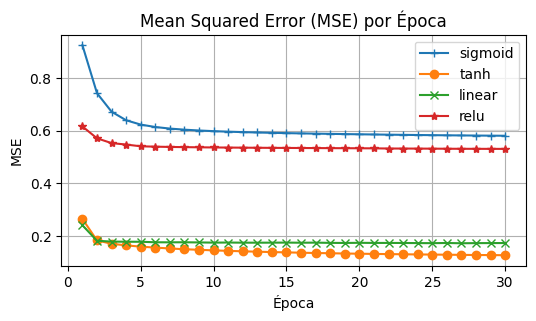

In [20]:
# getting MSE value for each epoch
plt.figure(figsize=(6, 3))

x = range(1, len(best_values_mse['sigmoid']) + 1)

y1 = best_values_mse['sigmoid']
y2 = best_values_mse['tanh']
y3 = best_values_mse['linear']
y4 = best_values_mse['relu']

plt.plot(x, y1, label='sigmoid', marker='+')
plt.plot(x, y2, label='tanh', marker='o')
plt.plot(x, y3, label='linear', marker='x')
plt.plot(x, y4, label='relu', marker='*')

plt.legend(loc='upper right')

plt.xlabel('Época')
plt.ylabel('MSE')

plt.title('Mean Squared Error (MSE) por Época')
plt.grid(True)
plt.show()

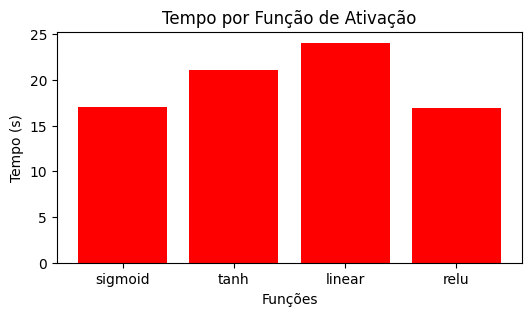

In [73]:
plt.figure(figsize=(6, 3))

plt.bar(functions, best_time.values(), color='blue')

plt.xlabel('Funções')
plt.ylabel('Tempo (s)')
plt.title('Tempo por Função de Ativação')
#plt.ylim(75, 150)

plt.show()

In [22]:
batchs = [round(1 * X_test.shape[1]), round(0.75 * X_test.shape[1]), round(0.5 * X_test.shape[1]), round(0.25 * X_test.shape[1]), 1]

mse_mlp_b = {batchs[i]: [] for i in range(0, len(batchs))}
rmse_mlp_b = {batchs[i]: [] for i in range(0, len(batchs))}
mae_mlp_b = {batchs[i]: [] for i in range(0, len(batchs))}
r2_mlp_b = {batchs[i]: [] for i in range(0, len(batchs))}

# getting MSE value for each epoch
mse_values_mlp_b = {batchs[i]: [] for i in range(0, len(batchs))}

# Run time
time_mlp_b = {batchs[i]: [] for i in range(0, len(batchs))}

In [24]:
for batch in batchs:
  # defining the model
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=best_config['neuron'], activation=best_config['function']), # hidden layer
    tf.keras.layers.Dense(units=1, activation=best_config['function']) # output layer
  ])

  # hyperparameters
  learning_rate = 0.01
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  loss_function = 'mean_squared_error'
  model.compile(optimizer=optimizer, loss=loss_function)

  # Contagem de tempo de execução
  start_time_mlp = time.time()

  # training
  num_epochs = 50
  batch_size = batch
  history = model.fit(X_train,
                      y_train,
                      epochs=num_epochs,
                      batch_size=None,
                      verbose=0)

  # Contagem de tempo de execução
  end_time_mlp = time.time()

  # predictions
  y_pred = model.predict(X_test)

  # evaluation
  mse_mlp_b[batch].append(mean_squared_error(y_test, y_pred))
  rmse_mlp_b[batch].append(np.sqrt(mean_squared_error(y_test, y_pred)))
  mae_mlp_b[batch].append(mean_absolute_error(y_test, y_pred))
  r2_mlp_b[batch].append(r2_score(y_test, y_pred))


  # getting MSE value for each epoch
  mse_values_mlp_b[batch].append(history.history['loss'])

  # Run time
  time_mlp_b[batch].append(end_time_mlp - start_time_mlp)

338/338 [==============================] - 0s 709us/step


In [118]:
os.makedirs('results/batchs', exist_ok=True)

mse_values_mlp_data_b = pd.DataFrame.from_dict(mse_values_mlp_b)
mse_values_mlp_data_b.head()
mse_values_mlp_data_b.to_csv('results/batchs/mse_values.csv')

mse_mlp_data_b = pd.DataFrame.from_dict(mse_mlp_b)
mse_mlp_data_b.head()
mse_mlp_data_b.to_csv('results/batchs/mse.csv')

rmse_mlp_data_b = pd.DataFrame.from_dict(rmse_mlp_b)
rmse_mlp_data_b.head()
rmse_mlp_data_b.to_csv('results/batchs/rmse.csv')

mae_mlp_data_b = pd.DataFrame.from_dict(mae_mlp_b)
mae_mlp_data_b.head()
mae_mlp_data_b.to_csv('results/batchs/mae.csv')

r2_mlp_data_b = pd.DataFrame.from_dict(r2_mlp_b)
r2_mlp_data_b.head()
r2_mlp_data_b.to_csv('results/batchs/r2.csv')

time_mlp_data_b = pd.DataFrame.from_dict(time_mlp_b)
time_mlp_data_b.head()
time_mlp_data_b.to_csv('results/batchs/time.csv')

In [25]:
for u in batchs:
    print(f'Menor MSE Values: {min([min(v) for v in mse_values_mlp_b[u]])} tamanho do lote ({u})')
    print("=" * 20)
    print(f'Menor MSE: {min(mse_mlp_b[u])} tamanho do lote ({u})')
    print("=" * 20)
    print(f'Menor RMSE: {min(rmse_mlp_b[u])} tamanho do lote ({u})')
    print("=" * 20)
    print(f'Menor MAE: {min(mae_mlp_b[u])} tamanho do lote ({u})')
    print("=" * 20)
    print(f'Maior R²: {max(r2_mlp_b[u])} tamanho do lote ({u})')
    print("=" * 20)
    print(f'Time: {min(time_mlp_b[u])} tamanho do lote ({u})')    
    print("=" * 20)

Menor MSE Values: 0.12240906804800034 tamanho do lote (98)
Menor MSE: 0.13731546952042398 tamanho do lote (98)
Menor RMSE: 0.3705610199689438 tamanho do lote (98)
Menor MAE: 0.22770280153961472 tamanho do lote (98)
Maior R²: 0.863914862364863 tamanho do lote (98)
Time: 31.996541023254395 tamanho do lote (98)
Menor MSE Values: 0.1226734071969986 tamanho do lote (74)
Menor MSE: 0.13851157440423265 tamanho do lote (74)
Menor RMSE: 0.37217143147242326 tamanho do lote (74)
Menor MAE: 0.23126981468559066 tamanho do lote (74)
Maior R²: 0.8627294744525787 tamanho do lote (74)
Time: 30.188945770263672 tamanho do lote (74)
Menor MSE Values: 0.12219685316085815 tamanho do lote (49)
Menor MSE: 0.13834085812667093 tamanho do lote (49)
Menor RMSE: 0.37194200909102876 tamanho do lote (49)
Menor MAE: 0.2326160604853681 tamanho do lote (49)
Maior R²: 0.862898661130596 tamanho do lote (49)
Time: 29.81225299835205 tamanho do lote (49)
Menor MSE Values: 0.12224514037370682 tamanho do lote (24)
Menor MSE: 

In [26]:
# Pegar menor valor e definir qual foi a melhor topologia

tmp_1_n = [min(valores) for valores in mse_values_mlp_b.values()]
tmp_2_n = [min(valores) for valores in tmp_1_n]
best_batch = batchs[tmp_2_n.index(min(tmp_2_n))]

print(f'Melhor tamanho lote: {best_batch} com valor do MSE: {min(tmp_2_n)}')

Melhor tamanho lote: 49 com valor do MSE: 0.12219685316085815


In [27]:
print(len(mse_values_mlp_b[best_batch]))

1


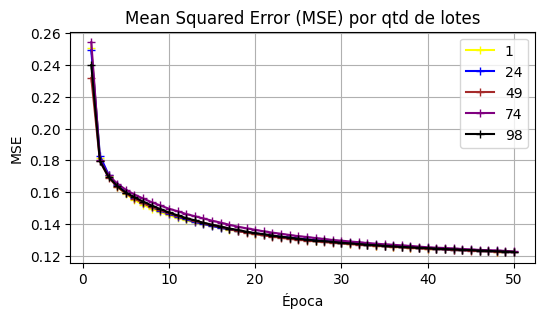

In [28]:
# getting MSE value for each epoch
plt.figure(figsize=(6, 3))

x = range(1, len(mse_values_mlp_b[1][0]) + 1)

y1 = mse_values_mlp_b[1][0]
y2 = mse_values_mlp_b[24][0]
y3 = mse_values_mlp_b[49][0]
y4 = mse_values_mlp_b[74][0]
y5 = mse_values_mlp_b[98][0]


plt.plot(x, y1, label='1', marker='+', color='yellow')
plt.plot(x, y2, label='24', marker='+', color='blue')
plt.plot(x, y3, label='49', marker='+', color='brown')
plt.plot(x, y4, label='74', marker='+', color='purple')
plt.plot(x, y5, label='98', marker='+', color='black')


plt.legend()

plt.xlabel('Época')
plt.ylabel('MSE')

plt.title('Mean Squared Error (MSE) por qtd de lotes')
plt.grid(True)
plt.show()

In [29]:
print([min(values) for values in time_mlp_b.values()])
batchs_t = [str(v) for v in batchs]
print(batchs_t)



[31.996541023254395, 30.188945770263672, 29.81225299835205, 30.008076906204224, 29.74703860282898]
['98', '74', '49', '24', '1']


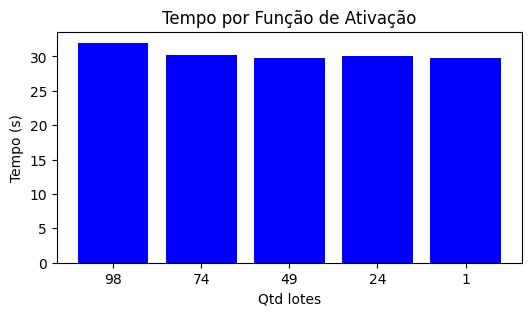

In [30]:
plt.figure(figsize=(6, 3))

time_mlp_min_b = [min(values) for values in time_mlp_b.values()]

plt.bar(batchs_t, time_mlp_min_b, color='blue')

plt.xlabel('Qtd lotes')
plt.ylabel('Tempo (s)')
plt.title('Tempo por Função de Ativação')
# plt.ylim(75, 150)

plt.show()

### **Radial Base Function - RBF**

In [31]:
from tensorflow.keras import backend as K

#
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        # print(input_shape)
        # print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [32]:
# hyperparameters
gamma = [1, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005]
units = [1.3, 1.2, 1.1, 1, 0.9, 0.8, 0.7]

# evaluation metrics
mse_values_rbf = {units[i]: {gamma[j]: [] for j in range(0, len(gamma))} for i in range(0, len(units))}
mse_rbf = {units[i]: {gamma[j]: [] for j in  range(0, len(gamma))} for i in range(0, len(units))}
rmse_rbf = {units[i]: {gamma[j]: [] for j in  range(0, len(gamma))} for i in range(0, len(units))}
mae_rbf = {units[i]: {gamma[j]: [] for j in  range(0, len(gamma))} for i in range(0, len(units))}
r2_rbf = {units[i]: {gamma[j]: [] for j in  range(0, len(gamma))} for i in range(0, len(units))}
time_rbf = {units[i]: {gamma[j]: [] for j in  range(0, len(gamma))} for i in range(0, len(units))}

In [33]:
for u in units:
  for g in gamma:
    # defining the model
    modelRBF = tf.keras.Sequential()
    modelRBF.add(tf.keras.Input(shape=(X_test.shape[1],)))
    modelRBF.add(RBFLayer(round(X_test.shape[1] * u), g))
    modelRBF.add(tf.keras.layers.Dense(units=1, activation='linear'))

    modelRBF.compile(
        loss='mean_squared_error'
    )

    # start of training time
    start_time_rbf = time.time()

    # training
    num_epochs = 30
    batch_size = 32
    historyRBF = modelRBF.fit(X_train,
                        y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        verbose=0)
    # end of training time
    end_time_rbf = time.time()

    # predictions
    y_pred = modelRBF.predict(X_test)

    mse_rbf[u][g].append(mean_squared_error(y_test, y_pred))
    rmse_rbf[u][g].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_rbf[u][g].append(mean_absolute_error(y_test, y_pred))
    r2_rbf[u][g].append(r2_score(y_test, y_pred))
    time_rbf[u][g].append(end_time_rbf - start_time_rbf)

    # getting MSE value for each epoch
    mse_values_rbf[u][g].append(historyRBF.history['loss'])



338/338 [==============================] - 0s 1ms/step


In [34]:
os.makedirs('results/rbf', exist_ok=True)

mse_values_rbf_data = pd.DataFrame.from_dict(mse_values_rbf)
mse_values_rbf_data.head()
mse_values_rbf_data.to_csv('results/rbf/mse_values.csv')

mse_rbf_data = pd.DataFrame.from_dict(mse_rbf)
mse_rbf_data.head()
mse_rbf_data.to_csv('results/rbf/mse.csv')

rmse_rbf_data = pd.DataFrame.from_dict(rmse_rbf)
rmse_rbf_data.head()
rmse_rbf_data.to_csv('results/rbf/rmse.csv')

mae_rbf_data = pd.DataFrame.from_dict(mae_rbf)
mae_rbf_data.head()
mae_rbf_data.to_csv('results/rbf/mae.csv')

r2_rbf_data = pd.DataFrame.from_dict(r2_rbf)
r2_rbf_data.head()
r2_rbf_data.to_csv('results/rbf/r2.csv')

time_rbf_data = pd.DataFrame.from_dict(time_rbf)
time_rbf_data.head()
time_rbf_data.to_csv('results/rbf/time.csv')


# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'MSE: {mse_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')
# print("============================================================")
# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'RMSE: {rmse_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')
# print("============================================================")
# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'MAE: {mae_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')
# print("============================================================")
# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'R²: {r2_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')
# print("============================================================")
# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'Time: {time_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')

In [35]:
for u in units:
    for g in gamma:
        print(f'Menor MSE Teste: {min([min(v) for v in mse_values_rbf[u][g]])} | {round(X_test.shape[1] * u)} neurônios | Desvio padrão: {g}')
        print("=" * 20)
        print(f'Menor MSE: {min(mse_rbf[u][g])} | {round(X_test.shape[1] * u)} neurônios | Desvio padrão: {g}')
        print("=" * 20)
        print(f'Menor RMSE: {min(rmse_rbf[u][g])} | {round(X_test.shape[1] * u)} neurônios | Desvio padrão: {g}')
        print("=" * 20)
        print(f'Menor MAE: {min(mae_rbf[u][g])} | {round(X_test.shape[1] * u)} neurônios | Desvio padrão: {g}')
        print("=" * 20)
        print(f'Maior R²: {max(r2_rbf[u][g])} | {round(X_test.shape[1] * u)} neurônios | Desvio padrão: {g}')
        print("=" * 20)
        print(f'Time: {min(time_rbf[u][g])} | {round(X_test.shape[1] * u)} neurônios | Desvio padrão: {g}')
        print("=" * 20)

Menor MSE Teste: 0.9961101412773132 | 127 neurônios | Desvio padrão: 1
Menor MSE: 1.009056833520079 | 127 neurônios | Desvio padrão: 1
Menor RMSE: 1.0045182096508152 | 127 neurônios | Desvio padrão: 1
Menor MAE: 0.8513576559766444 | 127 neurônios | Desvio padrão: 1
Maior R²: -1.579247290184327e-05 | 127 neurônios | Desvio padrão: 1
Time: 43.51941251754761 | 127 neurônios | Desvio padrão: 1
Menor MSE Teste: 0.42567193508148193 | 127 neurônios | Desvio padrão: 0.1
Menor MSE: 0.44218196805948373 | 127 neurônios | Desvio padrão: 0.1
Menor RMSE: 0.6649676443703737 | 127 neurônios | Desvio padrão: 0.1
Menor MAE: 0.45098338381716846 | 127 neurônios | Desvio padrão: 0.1
Maior R²: 0.5617799349679218 | 127 neurônios | Desvio padrão: 0.1
Time: 43.12072539329529 | 127 neurônios | Desvio padrão: 0.1
Menor MSE Teste: 0.9960967898368835 | 127 neurônios | Desvio padrão: 0.5
Menor MSE: 1.009084406354171 | 127 neurônios | Desvio padrão: 0.5
Menor RMSE: 1.0045319339643568 | 127 neurônios | Desvio padrão:

In [37]:
# Pegar menor valor e definir qual foi a melhor configuração

best_config_rbf = {'neuron': 0, 'gamma': 0, 'minimo': 0}
best_values_mse_rbf = {f: [] for f in units}
best_time_rbf = {f: 0 for f in units}

for u in units:
    for g in gamma:
        for t in time_rbf[u][g]:
            if best_time_rbf[u] == 0 or best_time_rbf[u] > t:
                best_time_rbf[u] = t
        for i in range(0, len(mse_values_rbf[u][g])):
            minimo = min(mse_values_rbf[u][g][i])
            if best_config_rbf['minimo'] == 0 or best_config_rbf['minimo'] > minimo:
                best_config_rbf['neuron'] = u
                best_config_rbf['gamma'] = g
                best_config_rbf['minimo'] = minimo
            if len(best_values_mse_rbf[u]) == 0 or minimo < min(best_values_mse_rbf[u]):
                best_values_mse_rbf[u] = mse_values_rbf[u][g][i]


print(f'Qtd neurônios: {best_config_rbf["neuron"] * X_test.shape[1]} | Desvio padrão: {best_config_rbf["gamma"]} | valor do MSE: {best_config["minimo"]}')

Qtd neurônios: 98 | Desvio padrão: 0.05 | valor do MSE: 0.12708339095115662


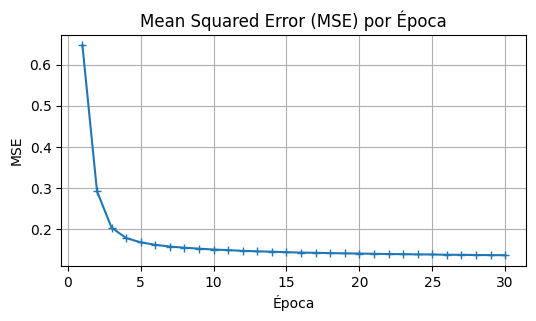

In [72]:
# getting MSE value for each epoch
mse_values_RBF = historyRBF.history['loss']

mse_values_rbf_data = pd.DataFrame.from_dict(mse_values_RBF)
mse_values_rbf_data.head()
mse_values_rbf_data.to_csv('results/rbf/mse_values_.csv')

# Plotting MSE for each epoch
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(mse_values_RBF) + 1), mse_values_RBF, marker='+')
plt.title('Mean Squared Error (MSE) por Época')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### **Comparassion**

In [58]:
mseMLP = []
for f in functions:
    for n in neurons:
        for i in range(0, len(mse_values_mlp[f][n])):
            mseMLP.append(min(mse_values_mlp[f][n][i]))

print(mseMLP)

mseRBF = []
for u in units:
    for g in gamma:
        for i in range(0, len(mse_values_rbf[u][g])):
            mseRBF.append(min(mse_values_rbf[u][g][i]))

print(mseRBF)

[0.5844045281410217, 0.5845927596092224, 0.5832231044769287, 0.5815061330795288, 0.5842618346214294, 0.5822989344596863, 0.5827211737632751, 0.583454966545105, 0.58173668384552, 0.5810113549232483, 0.5824846625328064, 0.5833500623703003, 0.5822365283966064, 0.5825084447860718, 0.5847762823104858, 0.5818180441856384, 0.5840837359428406, 0.5825640559196472, 0.5828654170036316, 0.5827403664588928, 0.5816063284873962, 0.5822231769561768, 0.5820956230163574, 0.5813679099082947, 0.5809459686279297, 0.5830473303794861, 0.581638514995575, 0.5842498540878296, 0.5811269283294678, 0.5808374285697937, 0.582815945148468, 0.5808078646659851, 0.5816654562950134, 0.582546055316925, 0.5818232297897339, 0.581579864025116, 0.5814793109893799, 0.5807176232337952, 0.5827130079269409, 0.58134925365448, 0.5826790928840637, 0.5816329717636108, 0.5818588733673096, 0.5832750201225281, 0.5812656879425049, 0.5832986831665039, 0.5818657875061035, 0.5835731029510498, 0.5841344594955444, 0.5834823250770569, 0.129190

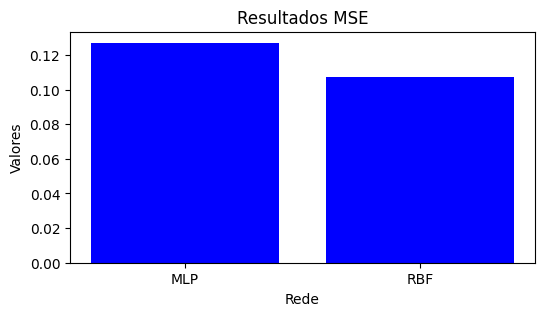

In [59]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [min(mseMLP), min(mseRBF)]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Valores')
plt.title('Resultados MSE')

# Exibir o gráfico
plt.show()

In [61]:
rmseMLP = []
for f in functions:
    for n in neurons:
        rmseMLP.append(min(rmse_mlp[f][n]))

print(rmseMLP)

rmseRBF = []
for u in units:
    for g in gamma:
        rmseRBF.append(min(rmse_rbf[u][g]))

print(rmseRBF)

[0.7666331455745947, 0.7671558369368245, 0.7667345730304489, 0.7666157610167746, 0.7671790531957069, 0.37548523877599554, 0.37513903149621974, 0.37929826370873065, 0.381459289554468, 0.3817492060598112, 0.412713367658635, 0.41276797519517366, 0.4107065804634639, 0.4097692026095928, 0.4104143719845241, 0.7353195005780372, 0.7366163722302705, 0.7377235291799691, 0.736880169244589, 0.7376646724261591]
[1.0045182096508152, 0.6649676443703737, 1.0045319339643568, 0.35937041514276746, 0.33555217660770087, 0.41895495906459534, 0.38666958246659766, 1.004513425864205, 0.6648797418230565, 1.004593144771355, 0.3666810867929787, 0.3363994350806227, 0.41686018129220487, 0.36730571807953805, 1.0045197901280016, 0.6812612558360387, 1.0045109181055272, 0.369374860783808, 0.33559051393603834, 0.42100450140543905, 0.40344470235497815, 1.0046128747700975, 0.6877530844081686, 1.0045302286677988, 0.3596821182465068, 0.3330663040367652, 0.4148744062047276, 0.36962579837977444, 1.004510507893478, 0.697968412

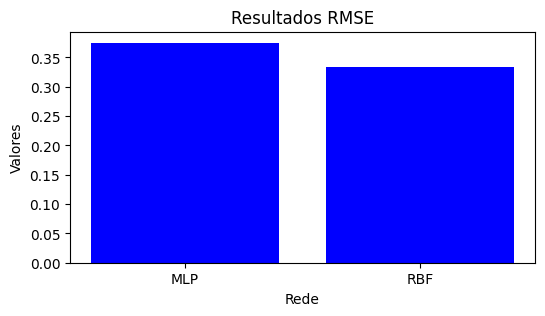

In [62]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [min(rmseMLP), min(rmseRBF)]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Valores')
plt.title('Resultados RMSE')

# Exibir o gráfico
plt.show()

In [63]:
maeMLP = []
for f in functions:
    for n in neurons:
        maeMLP.append(min(mae_mlp[f][n]))

print(maeMLP)

maeRBF = []
for u in units:
    for g in gamma:
        maeRBF.append(min(mae_rbf[u][g]))

print(maeRBF)

[0.5524584448423745, 0.5529290979535735, 0.5519296700126015, 0.5523481427772202, 0.5534863421280813, 0.23635948719046349, 0.23727502787235621, 0.24065638125517502, 0.24244299750549858, 0.2436222607853469, 0.3060244665531254, 0.30251839674634234, 0.298955166390332, 0.3012150617104451, 0.30083088122247004, 0.461993120349889, 0.46513360038980783, 0.46868815469186337, 0.4668760884410611, 0.4672422492518177]
[0.8513576559766444, 0.45098338381716846, 0.8513113730784286, 0.25101172770221875, 0.20903707600774946, 0.31180458906870534, 0.2904508346250845, 0.8513863683903626, 0.4590276187818728, 0.8517614122380952, 0.24843131043352604, 0.21171513578199616, 0.30912130866521026, 0.2569312763920712, 0.8513504304742759, 0.4694074875737826, 0.8514621589145556, 0.26977861261188524, 0.2095696422857196, 0.30563425078364487, 0.312296982392768, 0.8511876627090236, 0.47510700207292383, 0.8513159355272715, 0.24438983678583345, 0.2083045491714411, 0.30631534956975004, 0.2662863659777928, 0.851423827666034, 0.

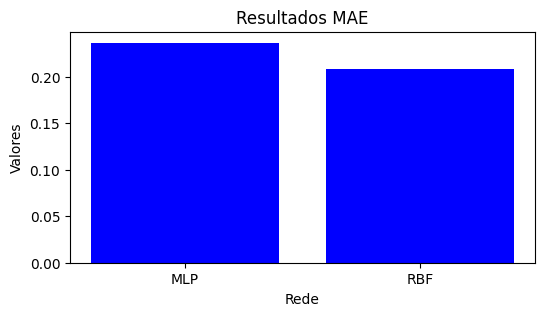

In [64]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [min(maeMLP), min(maeRBF)]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Valores')
plt.title('Resultados MAE')

# Exibir o gráfico
plt.show()

In [66]:
r2MLP = []
for f in functions:
    for n in neurons:
        r2MLP.append(max(r2_mlp[f][n]))

print(r2MLP)

r2RBF = []
for u in units:
    for g in gamma:
        r2RBF.append(max(r2_rbf[u][g]))

print(r2RBF)

[0.41753958545999903, 0.41674507033775054, 0.417385453365994, 0.41756600148963163, 0.41670976798669357, 0.8602740832601267, 0.8605316264253149, 0.8574218615922751, 0.8557925750710231, 0.8555732908573938, 0.831193835516153, 0.8311491619031516, 0.8328314585411212, 0.8335936633536412, 0.8330692472223847, 0.46414979922233923, 0.46225799096102393, 0.4606402907559438, 0.4618727697188362, 0.4607263492698306]
[-1.579247290184327e-05, 0.5617799349679218, -4.311825735658914e-05, 0.8720100488479396, 0.8884135782609826, 0.8260494118465178, 0.8518262577251563, -6.267805810811211e-06, 0.5618957845563675, -0.00016499653567048078, 0.866749683147302, 0.8878493625811493, 0.8277845714231519, 0.8662953198771596, -1.8939261829054033e-05, 0.5400415389510296, -1.2747988460404258e-06, 0.8647846801719233, 0.8883880789797018, 0.8243433041141368, 0.8386907526369671, -0.00020428298313501791, 0.5312337627499868, -3.972290757747743e-05, 0.8717879261304229, 0.8900607863615719, 0.8294214107485725, 0.8646008986729312,

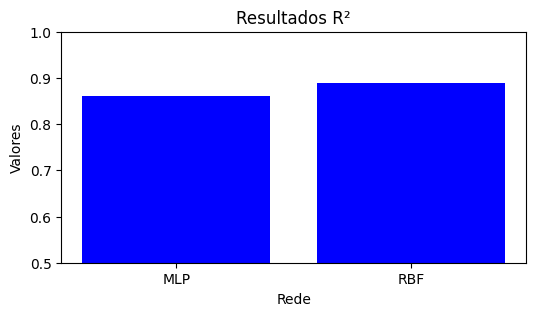

In [67]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [max(r2MLP), max(r2RBF)]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Valores')
plt.title('Resultados R²')
plt.ylim(0.5, 1)

# Exibir o gráfico
plt.show()

In [69]:
timeMLP = []
for f in functions:
    for n in neurons:
        timeMLP.append(min(time_mlp[f][n]))

print(timeMLP)

timeRBF = []
for u in units:
    for g in gamma:
        timeRBF.append(min(time_rbf[u][g]))

print(timeRBF)

[17.057608127593994, 19.31816077232361, 23.5516037940979, 23.574589014053345, 23.439907550811768, 23.9002788066864, 23.855808973312378, 21.13011384010315, 21.212658405303955, 23.687398672103882, 24.165467023849487, 24.13309335708618, 24.34997248649597, 24.485960721969604, 24.08483910560608, 26.08788299560547, 26.176461935043335, 24.32830786705017, 17.359127044677734, 16.952128410339355]
[43.51941251754761, 43.12072539329529, 41.4076783657074, 43.7169771194458, 40.06135368347168, 41.416160345077515, 40.90083837509155, 42.965959310531616, 40.54616165161133, 43.35623121261597, 43.809951305389404, 42.68360877037048, 42.632219314575195, 40.989378690719604, 42.967976570129395, 38.81194233894348, 35.995269775390625, 42.15837574005127, 44.70877432823181, 42.446619272232056, 43.03878951072693, 41.56048893928528, 41.73772954940796, 41.06205940246582, 36.87515425682068, 40.65646958351135, 41.26877975463867, 41.06137204170227, 39.507795572280884, 39.528257846832275, 39.623262882232666, 41.26740288

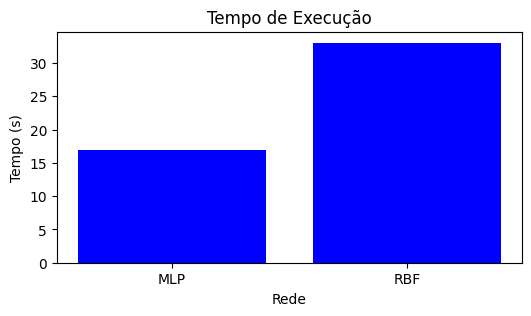

In [71]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [min(timeMLP), min(timeRBF)]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Tempo (s)')
plt.title('Tempo de Execução')

# Exibir o gráfico
plt.show()